In [4]:
import xgboost as xgb
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#filling missing values
train["Age"] = train["Age"].fillna(30)
train["Embarked"].fillna("S", inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#transform non-numerical labels to numerical labels
encoder = LabelEncoder()
for col in ('Sex','Embarked'):
    train['Sex'] = encoder.fit_transform(train['Sex'])
    train['Embarked'] = encoder.fit_transform(train['Embarked'])

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [8]:
#Features
train_x = train.drop(["PassengerId","Name","Ticket","Cabin","Survived"], axis=1)
#label
train_y = train["Survived"]
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [9]:
#Choose only the data that contains survivors
survived_label = train.groupby(['Survived'])
alive = survived_label.get_group(1)

In [10]:
#Choose only the data that contains dead people
dead = survived_label.get_group(0)

In [11]:
#ALIVE
#FEATURES
alive_x = alive.drop(["PassengerId","Name","Ticket","Cabin","Survived"], axis=1)
#label
alive_y = alive["Survived"]
alive_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
8,3,0,27.0,0,2,11.1333,2
9,2,0,14.0,1,0,30.0708,0


In [12]:
#DEAD
#FEATURES
dead_x = dead.drop(["PassengerId","Name","Ticket","Cabin","Survived"], axis=1)
#label
dead_y = dead["Survived"]
dead_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
4,3,1,35.0,0,0,8.0500,2
5,3,1,30.0,0,0,8.4583,1
6,1,1,54.0,0,0,51.8625,2
7,3,1,2.0,3,1,21.0750,2


In [13]:
#Sampling the data 80% train 20% test
#GENERAL
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, 
                                                  test_size=0.2, 
                                                  random_state=1)

#ALIVE
train_alive_x, test_alive_x, train_alive_y, test_alive_y = train_test_split(alive_x, alive_y, 
                                                  test_size=0.2, 
                                                  random_state=1)
#DEAD
train_dead_x, test_dead_x, train_dead_y, test_dead_y = train_test_split(dead_x, dead_y, 
                                                  test_size=0.2, 
                                                  random_state=1)

**Python API**

We need to convert the data into DMatrix. This is only necessary for the bare python api. The Following 4 (four) cells are an attempt to use this method. Unfortunately, as we will see, problems will arise. We will end up using the scikit-learn api.

In [14]:
#Converting to DMatrix
#GENERAL
d_train = xgb.DMatrix(train_x, train_y)
d_test = xgb.DMatrix(test_x, test_y)
#ALIVE
d_train_alive = xgb.DMatrix(train_alive_x, train_alive_y)
d_test_alive = xgb.DMatrix(test_alive_x, test_alive_y)
#DEAD
d_train_dead = xgb.DMatrix(train_dead_x, train_dead_y)
d_test_dead = xgb.DMatrix(test_dead_x, test_dead_y)

In [15]:
param = {
    'booster':'gbtree',
    'eta':0.3, #prevents overfitting
    'max_depth':3, #maximum depth of tree
    'objective':'binary:hinge',
    'rate_drop':0.1,
    'n_estimators':500
}

steṕs = 20

In [16]:
model = xgb.train(param, d_train, steṕs)

[18:06:17] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators, rate_drop } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [17]:
#predictions alive
predictions = model.predict(d_test_alive)
#print accuracy
print(np.round(accuracy_score(test_alive_y,predictions)*100, 2),'%')

76.81 %


I couldn't figure out how to obtain the probabilities. I tried to use the code we implemented in tensorflow but i kept getting an error.

Below, I use the XGB scikt-learn api. It seems to work well!

**XGB Classifier (scikit-learn API)**

In [18]:
#XGBClassifier scikit-learn API 
model = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 6, learning_rate=0.3)
#fit = training
model.fit(train_x, train_y)
#predictions
predict_alive = model.predict(test_alive_x)
print(np.round(accuracy_score(test_alive_y,predict_alive)*100, 2),'%')
print('\nPredictions', predict_alive)

88.41 %

Predictions [0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [19]:
predict_prob = model.predict_proba(test_alive_x)

In [66]:
#converting prob values to list
df_prob = pd.DataFrame(predict_prob)
s_prob_alive = df_prob[df_prob.columns[1]] 
list_prob_alive = s_prob_alive.values.tolist()

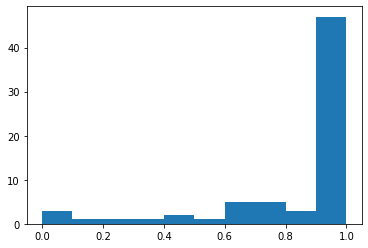

In [21]:
hist_alive = plt.hist(list_prob_alive, range=(0,1))

In [22]:
#converting prob values to list
predict_dead = model.predict(test_dead_x)
predict_prob_dead = model.predict_proba(test_dead_x)
df_prob_dead = pd.DataFrame(predict_prob_dead)
s_prob_dead = df_prob_dead[df_prob_dead.columns[1]] 
list_prob_dead = s_prob_dead.values.tolist()

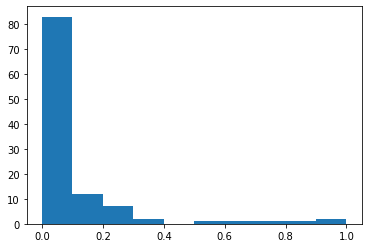

In [23]:
hist_dead = plt.hist(list_prob_dead, range=(0,1))

Text(0.5, 1.0, 'Results using XGB')

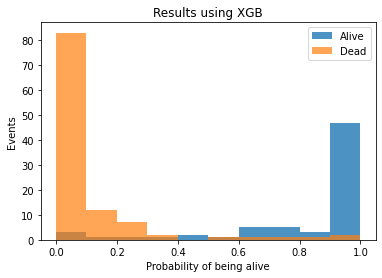

In [24]:
plt.hist(list_prob_alive, range=(0,1), alpha=0.8,label='Alive')
plt.hist(list_prob_dead, range=(0,1), alpha=0.7, label='Dead')
plt.legend(loc='upper right')
plt.xlabel('Probability of being alive')
plt.ylabel('Events')
plt.title('Results using XGB')

**ROC Curve**

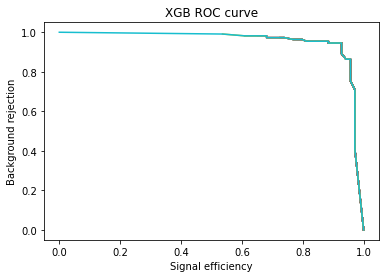

In [45]:
#CREEMOS DATOS ALEADORIOS Y ORDENEMOLOS DE MENOR A MAYOR

list_prob_alive = sorted(list_prob_alive)
list_prob_dead = sorted(list_prob_dead)

#LISTAS DONDE SE GUARDARAN LOS VALORES DE EFICIENCIA Y BACK_REJECTION
eficiency = []
background_rejection = []

#ITERAMOS SOBRE UN FLOAT QUE VA DE 0 A 100 EN 1000 PASOS
for cut in np.linspace(0,1, 50):
    
    #INICIALIZAMOS EL VALOR DE VIVOS ACEPTADOS Y MUERTOS RECHAZADOS
    #PUES EN EL CORTE = 0 ACEPTAMOS TODOS LOS 1s Y RECHAZAMOS TODOS LOS 0s
    vivos_aceptados = len(list_prob_alive)
    muertos_rechazados = 0


    for i, v in enumerate(list_prob_alive):
        # YA QUE LAS LISTAS ESTAN ORDENADAS BASTA CON CHECAR EL PRIMER VALOR QUE 
        # SEA MAYOR QUE EL CORTE
        if cut<=v:
            vivos_aceptados-=i
            break
        #EN EL CASO DE QUE EL CORTE SEA MAYOR QUE TODAS LAS PROBS CONSIDERA QUE 
        # NINGUN VIVO FUE ACEPTADO
        if i==len(list_prob_alive)-1:
            vivos_aceptados=0

    # ANALOGAMENTE PARA LOS MUERTOS        
    for i, m in enumerate(list_prob_dead):
        if cut<=m:
            muertos_rechazados+=i
            break
        if i==len(list_prob_dead)-1:
            muertos_rechazados=len(list_prob_dead)
    
    #ALMACENA EN LA LISTA
    eficiency.append(vivos_aceptados/len(list_prob_alive))
    background_rejection.append(muertos_rechazados/len(list_prob_dead))

    xgbst = plt.plot(eficiency, background_rejection)
    plt.xlabel('Signal efficiency')
    plt.ylabel('Background rejection')
    plt.title('XGB ROC curve')

**Tensorflow**

In [27]:
#FUNCTION ALIVE
#create input function
train_alive_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=train_alive_x,
                                                               y=train_alive_y,
                                                               num_epochs=None,
                                                               batch_size=100,
                                                               shuffle=True)

#validation function
test_alive_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=test_alive_x,
                                                             y=test_alive_y,
                                                              num_epochs=1,
                                                              batch_size=
                                                             len(test_alive_x),
                                                              shuffle=False)

In [29]:
#FUNCTION DEAD
#create input function
train_dead_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=train_dead_x,
                                                               y=train_dead_y,
                                                               num_epochs=None,
                                                               batch_size=100,
                                                               shuffle=True)

#validation function
test_dead_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=test_dead_x,
                                                             y=test_dead_y,
                                                              num_epochs=1,
                                                              batch_size=
                                                             len(test_dead_x),
                                                              shuffle=False)

In [30]:
#GENERAL FUNCTION
#create input function
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=train_x,
                                                               y=train_y,
                                                               num_epochs=None,
                                                               batch_size=100,
                                                               shuffle=True)

#validation function
test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=test_x,
                                                             y=test_y,
                                                              num_epochs=1,
                                                              batch_size=
                                                             len(test_x),
                                                              shuffle=False)

In [32]:
#Feature Columns
#the layman implementation of feature columns
Sex = tf.feature_column.numeric_column("Sex")
Embarked = tf.feature_column.numeric_column("Embarked")
Age = tf.feature_column.numeric_column("Age")
Fare = tf.feature_column.numeric_column("Fare")
Parch = tf.feature_column.numeric_column("Parch")
Pclass = tf.feature_column.numeric_column("Pclass")
SibSp = tf.feature_column.numeric_column("SibSp")

ft_columns = [Sex, Embarked, Age, Fare, Parch, Pclass, SibSp]


**BDT**

In [33]:
bdtmodel = tf.estimator.BoostedTreesClassifier(feature_columns=ft_columns, n_batches_per_layer=1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/alberto/tempfiles/tmpcslb4q2t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
bdtmodel.train(input_fn=train_input_fn, steps=500)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this i

In [36]:
accuracy_score = bdtmodel.evaluate(input_fn=test_alive_fn)["accuracy"]
print("\nTest accuracy: {0:f}%\n".format(accuracy_score*100))

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-28T18:24:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/alberto/tempfiles/tmpcslb4q2t/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.52317s
INFO:tensorflow:Finished evaluation at 2020-05-28-18:24:11
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.8405797, accuracy_baseline = 1.0, auc = 0.0, auc_precision_recall = 1.0, average_loss = 0.45786792, global_step = 500, label/mean = 1.0, loss = 0.45786792, precision = 1.0, prediction/mean = 0.8154595, recall = 0.8405797
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and proba

In [37]:
LABEL =['YOU DIED', 'YOU LIVED']
listabdt=[]
predictions = bdtmodel.predict(input_fn=test_alive_fn)
for i, predict in enumerate(predictions):
    listabdt.append(predict['probabilities'][1])
    label_ = predict['class_ids'][0]
    probs = predict['probabilities'][label_]
    print(f'Prediction \t{LABEL[label_]} ({100*probs} %) ')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/alberto/tempfiles/tmpcslb4q2t/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction 	YOU DIED (66.64618253707886 %) 
Prediction 	YOU LIVED (87.30825781822205 %) 
Prediction 	YOU LIVED (99.96976852416992 %) 
Prediction 	YOU LIVED (99.11206364631653 %) 
Prediction 	YOU LIVED (80.55319786071777 %) 
Prediction 	YOU LIVED (99.99927282333374 %) 
Prediction 	YOU LIVED (99.9944806098938 %) 
Prediction 	YOU LIVED (99.87860321998596 %) 
Prediction 	YOU LIVED (99.99191761016846 %) 
Prediction 	YOU DIED (79.71543073654175 %) 
Prediction 	YOU DIED (69.81295347213745 %) 
Prediction 	YOU LIVED (99.99637603759766 %) 
Prediction 	YOU LIVED (99.99196529388428 %) 
Prediction 	YOU LIVED (99.86213445663452 %) 
Prediction 	YOU LIVED (99.9419093132019 %) 
Prediction 	YOU LIVED (98.57929348945618 %) 

(array([ 4.,  1.,  2.,  2.,  2.,  3.,  2.,  5.,  2., 46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

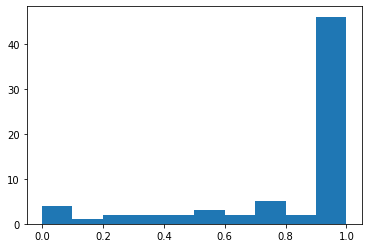

In [38]:
plt.hist(listabdt, range=(0,1))

In [39]:
LABEL =['YOU DIED', 'YOU LIVED']
listabdt2=[]
predictions = bdtmodel.predict(input_fn=test_dead_fn)
for i, predict in enumerate(predictions):
    listabdt2.append(predict['probabilities'][1])
    label_ = predict['class_ids'][0]
    probs = predict['probabilities'][label_]
    print(f'Prediction \t{LABEL[label_]} ({100*probs} %) ')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/alberto/tempfiles/tmpcslb4q2t/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction 	YOU DIED (99.95525479316711 %) 
Prediction 	YOU LIVED (99.98546838760376 %) 
Prediction 	YOU DIED (99.97144341468811 %) 
Prediction 	YOU DIED (99.90215301513672 %) 
Prediction 	YOU LIVED (99.62462782859802 %) 
Prediction 	YOU DIED (81.22875690460205 %) 
Prediction 	YOU DIED (76.81828737258911 %) 
Prediction 	YOU DIED (99.72932934761047 %) 
Prediction 	YOU DIED (99.97207522392273 %) 
Prediction 	YOU DIED (99.95525479316711 %) 
Prediction 	YOU DIED (99.82860684394836 %) 
Prediction 	YOU DIED (99.92504715919495 %) 
Prediction 	YOU DIED (99.94903802871704 %) 
Prediction 	YOU DIED (78.8767158985138 %) 
Prediction 	YOU DIED (99.99183416366577 %) 
Prediction 	YOU DIED (96.58346176147461 %) 
Predictio

(array([82.,  6.,  5.,  3.,  3.,  2.,  2.,  0.,  4.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

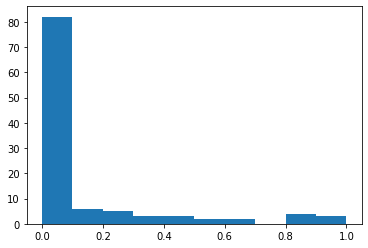

In [40]:
plt.hist(listabdt2, range=(0,1))

Text(0.5, 1.0, 'Results using a BDT')

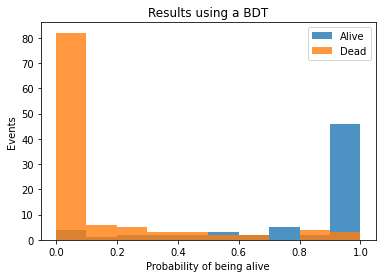

In [42]:
plt.hist(listabdt, range=(0,1), alpha=0.8, label='Alive')
plt.hist(listabdt2, range=(0,1), alpha=0.8, label='Dead')
plt.legend(loc='upper right')
plt.xlabel('Probability of being alive')
plt.ylabel('Events')
plt.title('Results using a BDT')

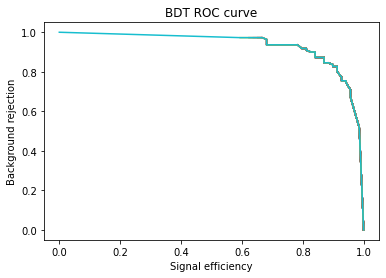

In [43]:
#CREEMOS DATOS ALEADORIOS Y ORDENEMOLOS DE MENOR A MAYOR

listabdt = sorted(listabdt)
listabdt2 = sorted(listabdt2)

#LISTAS DONDE SE GUARDARAN LOS VALORES DE EFICIENCIA Y BACK_REJECTION
eficiency2 = []
background_rejection2 = []

#ITERAMOS SOBRE UN FLOAT QUE VA DE 0 A 100 EN 1000 PASOS
for cut in np.linspace(0,1, 50):
    
    #INICIALIZAMOS EL VALOR DE VIVOS ACEPTADOS Y MUERTOS RECHAZADOS
    #PUES EN EL CORTE = 0 ACEPTAMOS TODOS LOS 1s Y RECHAZAMOS TODOS LOS 0s
    vivos_aceptados = len(listabdt)
    muertos_rechazados = 0


    for i, v in enumerate(listabdt):
        # YA QUE LAS LISTAS ESTAN ORDENADAS BASTA CON CHECAR EL PRIMER VALOR QUE 
        # SEA MAYOR QUE EL CORTE
        if cut<=v:
            vivos_aceptados-=i
            break
        #EN EL CASO DE QUE EL CORTE SEA MAYOR QUE TODAS LAS PROBS CONSIDERA QUE 
        # NINGUN VIVO FUE ACEPTADO
        if i==len(listabdt)-1:
            vivos_aceptados=0

    # ANALOGAMENTE PARA LOS MUERTOS        
    for i, m in enumerate(listabdt2):
        if cut<=m:
            muertos_rechazados+=i
            break
        if i==len(listabdt2)-1:
            muertos_rechazados=len(listabdt2)
    
    #ALMACENA EN LA LISTA
    eficiency2.append(vivos_aceptados/len(listabdt))
    background_rejection2.append(muertos_rechazados/len(listabdt2))

    arbol = plt.plot(eficiency2, background_rejection2)
    plt.xlabel('Signal efficiency')
    plt.ylabel('Background rejection')
    plt.title('BDT ROC curve')

**XGB VS BDT**

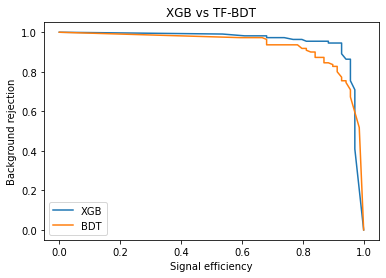

In [67]:
xgbst = plt.plot(eficiency, background_rejection, label = 'XGB')
arbol = plt.plot(eficiency2, background_rejection2, label = 'BDT')
plt.legend(loc='lower left')
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection')
plt.title('XGB vs TF-BDT')
plt.show()

**DNN**

In [49]:
dnnmodel = tf.estimator.DNNClassifier(feature_columns=ft_columns,
                                   hidden_units=[35,25,30], 
                                   n_classes=2, 
                                   optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/alberto/tempfiles/tmp7ghcqsy3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
dnnmodel.train(input_fn=train_input_fn, steps=500)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/alberto/tempfiles/tmp7ghcqsy3/model.ckpt-500
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 500...
INFO:tensorflow:Saving checkpoi

In [55]:
accuracy_score = dnnmodel.evaluate(input_fn=test_alive_fn)["accuracy"]
print("\nTest accuracy: {0:f}%\n".format(accuracy_score*100))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-28T19:19:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/alberto/tempfiles/tmp7ghcqsy3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.65823s
INFO:tensorflow:Finished evaluation at 2020-05-28-19:19:12
INFO:tensorflow:Saving dict for global step 1000: accuracy =

In [57]:
LABEL =['YOU DIED', 'YOU LIVED']
listadnn = []
predictions = dnnmodel.predict(input_fn=test_alive_fn)
for i, predict in enumerate(predictions):
    listadnn.append(predict['probabilities'][1])
    label_ = predict['class_ids'][0]
    probs = predict['probabilities'][label_]
    print(f'Prediction \t{LABEL[label_]} ({100*probs} %) ')

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/alberto/tempfiles/tmp7ghcqsy3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction 	YOU DIED (87.1526837348938 %) 
Prediction 	YOU LIVED (59.64033007621765 %) 
Prediction 	YOU LIVED (72.28158116340637 %) 
Prediction 	YOU DIED (68.8311517238617 %) 
Prediction 	YOU DIED (68.18563342094421 %) 
P

In [58]:
LABEL =['YOU DIED', 'YOU LIVED']
listadnn2 = []
predictions2 = dnnmodel.predict(input_fn=test_dead_fn)
for i, predict in enumerate(predictions2):
    listadnn2.append(predict['probabilities'][1])
    label_ = predict['class_ids'][0]
    probs = predict['probabilities'][label_]
    print(f'Prediction \t{LABEL[label_]} ({100*probs} %) ')

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/alberto/tempfiles/tmp7ghcqsy3/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction 	YOU DIED (91.07653498649597 %) 
Prediction 	YOU LIVED (58.32105278968811 %) 
Prediction 	YOU DIED (91.09519124031067 %) 
Prediction 	YOU DIED (91.30980372428894 %) 
Prediction 	YOU LIVED (99.55223798751831 %) 

Text(0.5, 1.0, 'Results using a DNN')

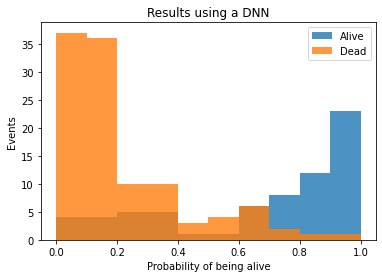

In [60]:
plt.hist(listadnn, range=(0,1), alpha=0.8,label='Alive')
plt.hist(listadnn2, range=(0,1), alpha=0.8, label='Dead')
plt.legend(loc='upper right')
plt.xlabel('Probability of being alive')
plt.ylabel('Events')
plt.title('Results using a DNN')

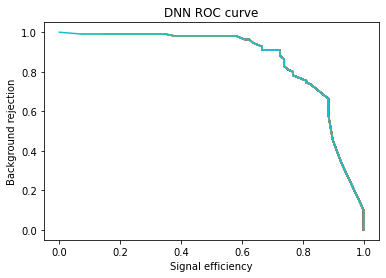

In [62]:
#CREEMOS DATOS ALEADORIOS Y ORDENEMOLOS DE MENOR A MAYOR

listadnn = sorted(listadnn)
listadnn2 = sorted(listadnn2)

#LISTAS DONDE SE GUARDARAN LOS VALORES DE EFICIENCIA Y BACK_REJECTION
eficiency0 = []
background_rejection0 = []

#ITERAMOS SOBRE UN FLOAT QUE VA DE 0 A 100 EN 1000 PASOS
for cut in np.linspace(0,1, 50):
    
    #INICIALIZAMOS EL VALOR DE VIVOS ACEPTADOS Y MUERTOS RECHAZADOS
    #PUES EN EL CORTE = 0 ACEPTAMOS TODOS LOS 1s Y RECHAZAMOS TODOS LOS 0s
    vivos_aceptados = len(listadnn)
    muertos_rechazados = 0


    for i, v in enumerate(listadnn):
        # YA QUE LAS LISTAS ESTAN ORDENADAS BASTA CON CHECAR EL PRIMER VALOR QUE 
        # SEA MAYOR QUE EL CORTE
        if cut<=v:
            vivos_aceptados-=i
            break
        #EN EL CASO DE QUE EL CORTE SEA MAYOR QUE TODAS LAS PROBS CONSIDERA QUE 
        # NINGUN VIVO FUE ACEPTADO
        if i==len(listadnn)-1:
            vivos_aceptados=0

    # ANALOGAMENTE PARA LOS MUERTOS        
    for i, m in enumerate(listadnn2):
        if cut<=m:
            muertos_rechazados+=i
            break
        if i==len(listadnn2)-1:
            muertos_rechazados=len(listadnn2)
    
    #ALMACENA EN LA LISTA
    eficiency0.append(vivos_aceptados/len(listadnn))
    background_rejection0.append(muertos_rechazados/len(listadnn2))

    neural = plt.plot(eficiency0, background_rejection0)
    plt.xlabel('Signal efficiency')
    plt.ylabel('Background rejection')
    plt.title('DNN ROC curve')

Text(0.5, 1.0, 'XGB vs TF-DNN')

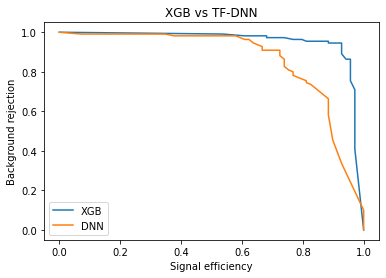

In [63]:
xgbst = plt.plot(eficiency, background_rejection, label = 'XGB')
neural = plt.plot(eficiency0, background_rejection0, label = 'DNN')
plt.legend(loc='lower left')
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection')
plt.title('XGB vs TF-DNN')

Text(0.5, 1.0, 'BDT vs DNN')

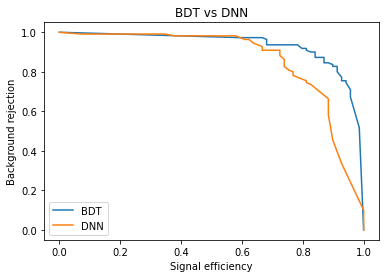

In [71]:
arbol = plt.plot(eficiency2, background_rejection2, label = 'BDT')
neural = plt.plot(eficiency0, background_rejection0, label = 'DNN')
plt.legend(loc='lower left')
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection')
plt.title('BDT vs DNN')

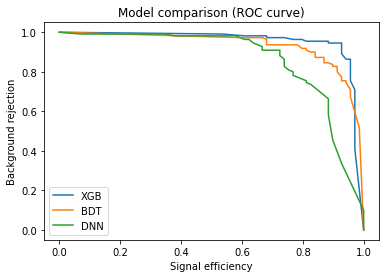

In [72]:
xgbst = plt.plot(eficiency, background_rejection, label='XGB')
arbol = plt.plot(eficiency2, background_rejection2, label = 'BDT')
neural = plt.plot(eficiency0, background_rejection0, label = 'DNN')
plt.legend(loc='lower left')
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection')
plt.title('Model comparison (ROC curve)')
plt.show()